# Arvores de Decisão - Jogo da Velha - TicTacToe

In [ ]:
### Disponível em https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame

Jogo da Velha - TicTacToe

Number of Instances: 958 (legal tic-tac-toe endgame boards)

Number of Attributes: 9, each corresponding to one tic-tac-toe square

Attribute Information: (x=player x has taken, o=player o has taken, b=blank)

    1. top-left-square: {x,o,b}
    2. top-middle-square: {x,o,b}
    3. top-right-square: {x,o,b}
    4. middle-left-square: {x,o,b}
    5. middle-middle-square: {x,o,b}
    6. middle-right-square: {x,o,b}
    7. bottom-left-square: {x,o,b}
    8. bottom-middle-square: {x,o,b}
    9. bottom-right-square: {x,o,b}
   10. Class: {positive,negative} ("x" ganha)

Missing Attribute Values: None

Class Distribution: About 65.3% are positive (i.e., wins for "x")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("tic-tac-toe.data")
df.columns = ["top-left-square", "top-middle-square", "top-right-square", 
              "middle-left-square", "middle-middle-square", "middle-right-square",
              "bottom-left-square", "bottom-middle-square", "bottom-right-square", "Class"]
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [4]:
df.describe()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
count,957,957,957,957,957,957,957,957,957,957
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,417,377,417,377,458,378,417,378,418,625


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
top-left-square         957 non-null object
top-middle-square       957 non-null object
top-right-square        957 non-null object
middle-left-square      957 non-null object
middle-middle-square    957 non-null object
middle-right-square     957 non-null object
bottom-left-square      957 non-null object
bottom-middle-square    957 non-null object
bottom-right-square     957 non-null object
Class                   957 non-null object
dtypes: object(10)
memory usage: 74.8+ KB


## Preparação dos dados

### converter as strings para numeros
### x = 1, o = 0, b = 2

In [6]:
df2 = df

In [7]:
df2 = df2.replace("x", 1) 
df2 = df2.replace("o", 0) 
df2 = df2.replace("b", 2) 
df2.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,1,1,1,1,0,0,0,1,0,positive
1,1,1,1,1,0,0,0,0,1,positive
2,1,1,1,1,0,0,0,2,2,positive
3,1,1,1,1,0,0,2,0,2,positive
4,1,1,1,1,0,0,2,2,0,positive


### limpeza dos dados missing

In [8]:
df2 = df2.dropna()
len(df2)

957

In [9]:
df2.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,1,1,1,1,0,0,0,1,0,positive
1,1,1,1,1,0,0,0,0,1,positive
2,1,1,1,1,0,0,0,2,2,positive
3,1,1,1,1,0,0,2,0,2,positive
4,1,1,1,1,0,0,2,2,0,positive


## Aplicar o algoritmo de Classificação - Árvore de Decisão

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [11]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

jogo_data = df2.loc[:,["top-left-square", "top-middle-square", "top-right-square", 
              "middle-left-square", "middle-middle-square", "middle-right-square",
              "bottom-left-square", "bottom-middle-square", "bottom-right-square"]]
jogo_target = df2["Class"]

In [12]:
jogo_data[:3]

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,1,1,1,1,0,0,0,1,0
1,1,1,1,1,0,0,0,0,1
2,1,1,1,1,0,0,0,2,2


In [13]:
jogo_target[:3]

0    positive
1    positive
2    positive
Name: Class, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    jogo_data, jogo_target, test_size=0.33, random_state=42)

X_train[:3]

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
897,2,1,0,1,0,2,0,1,2
181,1,0,0,2,1,2,1,0,1
274,1,2,2,1,1,0,1,0,0


In [15]:
print("# dados de treino = ", len(X_train))
print("# dados de teste = ", len(X_test))    

# dados de treino =  641
# dados de teste =  316


### aplicar o algoritmo de arvores de decisao

In [16]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.896


### Previsao

In [17]:
import numpy as np

In [18]:
# x = 1, o = 0, b = 2
partida = np.array( [       
           1, 0, 0,
           0, 1, 0,
           0, 1,  1 
])
jogo = partida.reshape(1, -1)
print (jogo)
print(tree.predict(jogo))

[[1 0 0 0 1 0 0 1 1]]
['positive']


In [19]:
# x = 1, o = 0, b = 2
partida = np.array( [       
           0, 0, 0,
           0, 1, 0,
           0, 1,  1 
])
jogo = partida.reshape(1, -1)
print (jogo)
print(tree.predict(jogo))

[[0 0 0 0 1 0 0 1 1]]
['negative']


In [20]:
# x = 1, o = 0, b = 2
partida = np.array( [       
           1, 1, 0,
           0, 1, 1,
           1, 0,  0 
])
jogo = partida.reshape(1, -1)
print (jogo)
print(tree.predict(jogo))

[[1 1 0 0 1 1 1 0 0]]
['negative']


### Atributos mais relevantes

Atributos mais relavantes


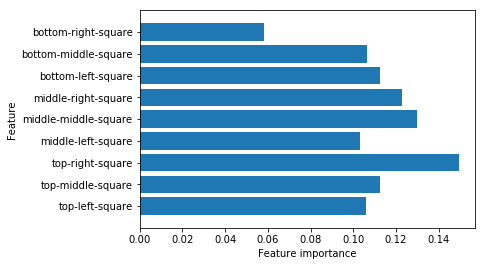

In [21]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(model):
    columns = ["top-left-square", "top-middle-square", "top-right-square", 
              "middle-left-square", "middle-middle-square", "middle-right-square",
              "bottom-left-square", "bottom-middle-square", "bottom-right-square"]
    n_features = len(columns)
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    

plot_feature_importances(tree)

### Analisando a árvore de decisao

In [ ]:
# Class: positive,negative
Class = ["positive","negative"]
features = ["top-left-square", "top-middle-square", "top-right-square", 
              "middle-left-square", "middle-middle-square", "middle-right-square",
              "bottom-left-square", "bottom-middle-square", "bottom-right-square"]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["positive","negative",],
                feature_names=features, impurity=False, filled=True)

In [ ]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
# http://www.graphviz.org/Download_macos.php
# !pip install graphviz

import graphviz
from IPython.display import set_matplotlib_formats, display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))